In [1]:
# load modules
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib.pylab as plt
import numpy as np
from pysz import pysz

In [2]:
# initialize tsz_cl class
tsz = pysz.tsz_cl()

# tSZ $C_{\ell}$ calculation
- Calculate the angular auto-power spectrum of Compton-Y for the multipoles specified by the numpy array, ell_arr.
- Tll is the non-Gaussian term of the covariance matrix.
    - if you set flag_tll:False, the outcome will be the empty.
- flag_nu specifies how to compute the power spectrum and mass functions with massive neutrinos. Normally, you should set it to be True
- cl_yy[0] will be the 1-halo term while cl_yy[1] be the 2-halo term.

In [3]:
# - Calculate the angular auto-power spectrum of Compton-Y for the multipoles, ell_arr.
# - Tll is the non-Gaussian term of the covariance matrix.
# if you set flag_tll:False, the outcome will be the empty.
# cl_yy[0] will be the 1-halo term while cl_yy[1] be the 2-halo term.

# set parameters
pars = {'h0':0.7, 'obh2':0.025,'och2':0.12,\
        'As':np.exp(3.06)*1e-10,'ns':0.9645,'mnu':0.06,\
        'flag_nu':True, 'flag_tll':False, 'mass_bias':1.5}

# array of multipoles
ell_arr = np.logspace(1,4.0,20)

cl_yy, tll = tsz.get_tsz_cl(ell_arr,pars)

# you can change integration range by passing optional arguments z1, z2, Mmin, Mmax
cl_yy, tll = tsz.get_tsz_cl(ell_arr,pars,zmin=1e-5,zmax=4.0,Mmin=1e11,Mmax=5e15)

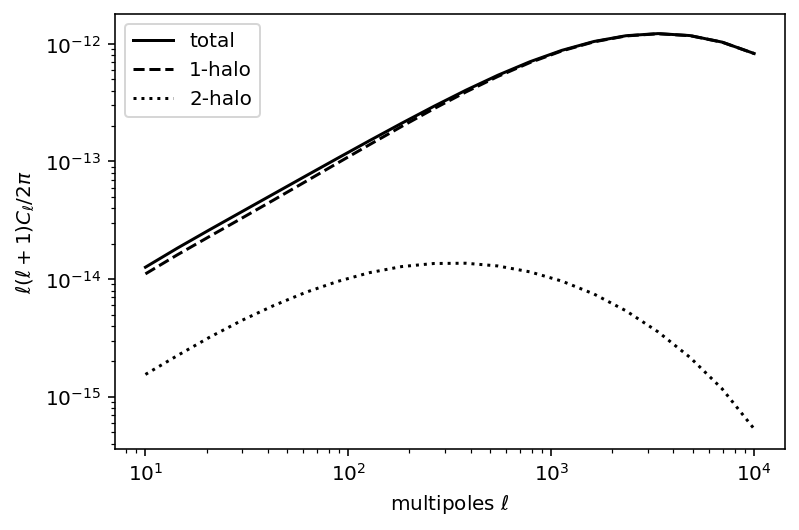

In [4]:
# plot
factor = ell_arr*(ell_arr+1)/np.pi
plt.loglog(ell_arr,(cl_yy[0]+cl_yy[1])*factor,'k-',label='Total')
plt.loglog(ell_arr,(cl_yy[0])*factor,'k--',label='1-halo')
plt.loglog(ell_arr,(cl_yy[1])*factor,'k:',label='2-halo')
plt.xlabel(r'multipoles $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_{\ell}/2\pi$')
plt.legend()

# b_Y and dY/dz calculation

In [5]:
# Calculate the b_Y and dY/dz, defined in Chiang et al. (2020)
# set parameters
pars = {'h0':0.7, 'obh2':0.025,'och2':0.12,\
        'As':np.exp(3.06)*1e-10,'ns':0.9645,'mnu':0.06,\
        'flag_nu':True, 'mass_bias':1.5}

# array of redshifts at which b_Y and dY/dz calculated
zarr = np.logspace(np.log10(1e-2),np.log10(4.),100)

# calculate b_Y and dY/dz
by, dydz = tsz.get_by_dydz(zarr,pars)
# you can change integration range by passing optional arguments Mmin, Mmax
by, dydz = tsz.get_by_dydz(zarr,pars,Mmin=1e11,Mmax=5e15)

Text(0, 0.5, 'dY/dz(1+z)')

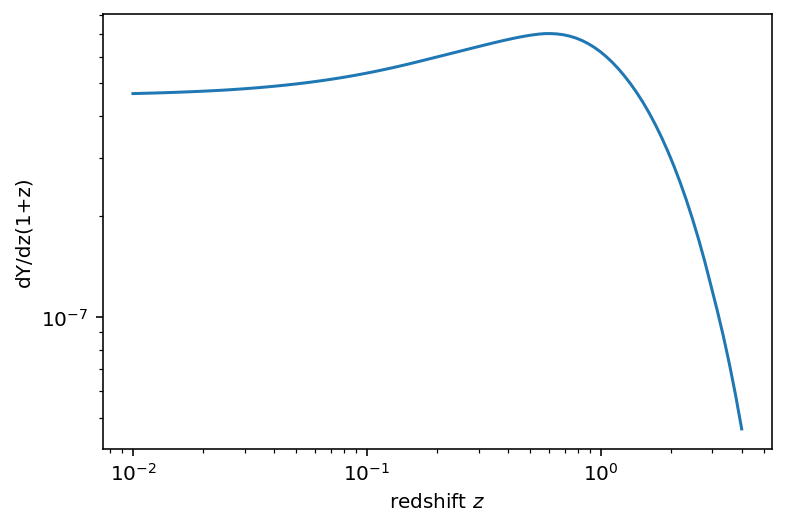

In [6]:
# plot
plt.loglog(zarr,dydz*(1+zarr))
plt.xlabel(r'redshift $z$')
plt.ylabel(r'dY/dz(1+z)')

# dy/dz/dlogMh

In [7]:
# Calculate dy/dz/dlogMh at ell = 0.
# set parameters
pars = {'h0':0.7, 'obh2':0.025,'och2':0.12,\
        'As':np.exp(3.06)*1e-10,'ns':0.9645,'mnu':0.06,\
        'flag_nu':True, 'mass_bias':1.5}

z = 1.0
Mh = 1e15 # in Msun/h

# calculate dy/dz/dlogMh as a function of mass
for Mh in [1e10, 1e11, 1e12, 1e13, 1e14, 1e15]:
    dydzdMh = tsz.get_dydzdlogMh(z,Mh,pars)
    print(dydzdMh)

1.2671171256145233e-10
2.328873888457516e-09
1.563941725706893e-08
6.415728940302841e-08
5.428812538814431e-08
7.574782852669661e-11
